## Bayesian optimizaiton of function networkの可視化
問題設定は2つノードf1, f2について考える。
決定変数はノードf1の入力として入るx1のみとする

In [1]:
# 必要なライブラリ系のimport
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
print(f'{np.__version__ = }')
print(f'{matplotlib.__version__ = }')
print(f'{pd.__version__ = }')

np.__version__ = '1.24.1'
matplotlib.__version__ = '3.7.1'
pd.__version__ = '1.5.3'


In [2]:
# ノードの関数
def f1(x):
    return (2*x + 1) / 2

def f2(x):
    return - (x ** 2)  / 3

def f(x):
    return f2(f1(x))

In [3]:
# カーネル関数
def rbf_kernel(x, x_prime, theta1=4, theta2=6):
    return theta1 * np.exp( -1 * (x-x_prime)**2 / theta2)

In [4]:
# 分散共分散行列の作成
x = np.arange(-10, 10, 0.01)
K = rbf_kernel(x, x.reshape(len(x),1))

In [5]:
# 得られる結果
data_x = np.array([-6.888, -4.888, 2.576, 6.234])
data_h1 = f1(data_x)
data_h2 = f(data_x)

(-10.0, 10.0)

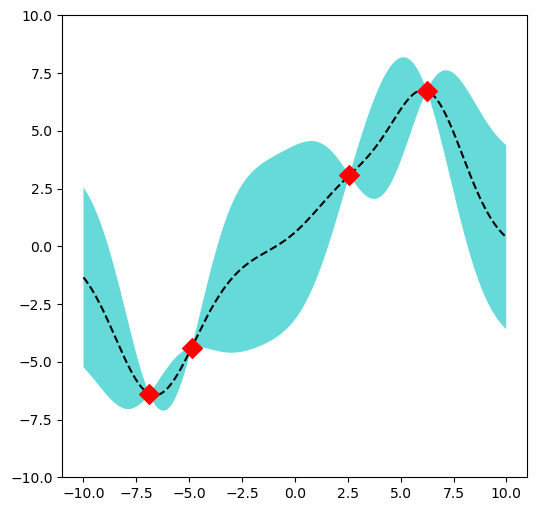

In [6]:
# f1に関するガウス過程回帰 (入力 data_x, 出力 data_h1)

K_data1 = rbf_kernel(data_x, data_x.reshape(len(data_x), 1))
K_data1_inv = np.linalg.inv(K_data1)
k_data1_star = rbf_kernel(x, data_x.reshape(len(data_x), 1))

mean_h1 = np.average(data_h1) + np.dot(np.dot(k_data1_star.T, K_data1_inv), (data_h1 - np.average(data_h1)))
covar_h1 = K - np.dot(np.dot(k_data1_star.T, K_data1_inv), k_data1_star)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(x, mean_h1, c = 'k', linestyle="dashed", zorder=1)
ax.scatter(data_x, data_h1, color = 'r', marker ="D", s=100,  zorder=2)
ax.fill_between(x, mean_h1 +2*np.sqrt(abs(np.diag(covar_h1))), mean_h1 - 2*np.sqrt(abs(np.diag(covar_h1))), facecolor='#66D9D9', zorder=0)
ax.set_ylim(-10, 10)

(-20.0, 0.0)

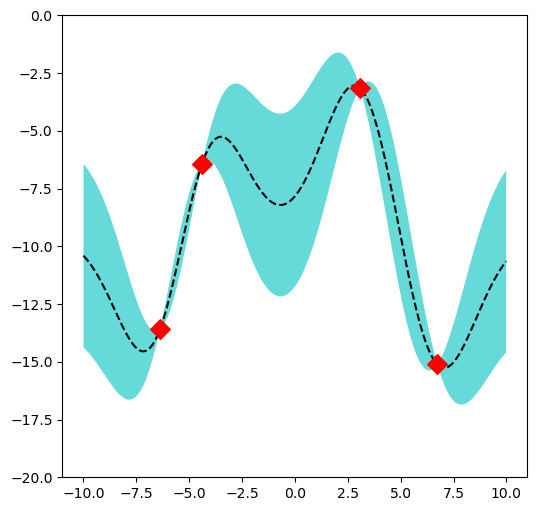

In [7]:
# f2に関するガウス過程回帰 (入力 data_h1, 出力 data_h2)
h1 = np.arange(-10, 10, 0.01)

K_data2 = rbf_kernel(data_h1, data_h1.reshape(len(data_h1), 1))
K_data2_inv = np.linalg.inv(K_data2)
k_data2_star = rbf_kernel(h1, data_h1.reshape(len(data_h1), 1))

mean_h2 = np.average(data_h2) + np.dot(np.dot(k_data2_star.T, K_data2_inv), (data_h2 - np.average(data_h2)))
covar_h2 = K - np.dot(np.dot(k_data2_star.T, K_data2_inv), k_data2_star)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(h1, mean_h2, c = 'k', linestyle="dashed", zorder=1)
ax.scatter(data_h1, data_h2, color = 'r', marker ="D", s=100,  zorder=2)
ax.fill_between(h1, mean_h2 + 2* np.sqrt(abs(np.diag(covar_h2))), mean_h2 - 2* np.sqrt(abs(np.diag(covar_h2))), facecolor='#66D9D9', zorder=0)
ax.set_ylim(-20, 0)

0.601260234816778
3.555508473556477


(-10.0, 10.0)

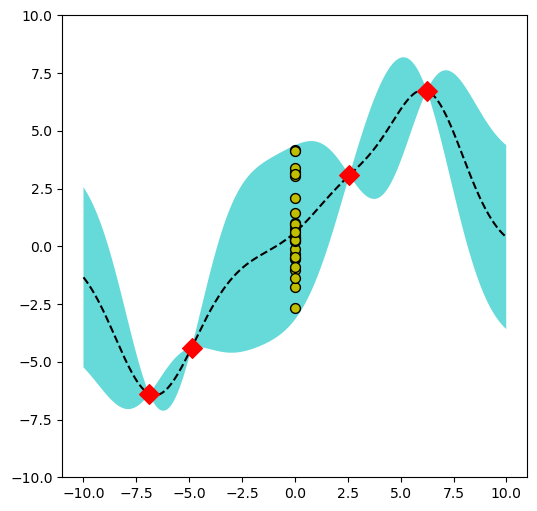

In [8]:
# x が特定の値の時にf1の事後分布からデータ点を得る！その後得られたデータ点をf2の事後分布に入れてどんなサンプルが出てくるか見る！
# とりあえずx = 0の時で
N = 30
sample_x = np.full(N, x[1000])
sample_h1 = np.random.normal(loc = mean_h1[1000], scale = np.sqrt(abs(covar_h1[1000,1000])), size = N)
print(mean_h1[1000])
print(covar_h1[1000, 1000])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(x, mean_h1, c = 'k', linestyle="dashed", zorder=1)
ax.scatter(data_x, data_h1, color = 'r', marker ="D", s=100,  zorder=2)
ax.fill_between(x, mean_h1 +2* np.sqrt(abs(np.diag(covar_h1))), mean_h1 - 2*np.sqrt(abs(np.diag(covar_h1))), facecolor='#66D9D9', zorder=0)
ax.scatter(sample_x, sample_h1, color = 'y', edgecolors="k", marker ="o", s=50,  zorder=3)
ax.set_ylim(-10, 10)

(-20.0, 0.0)

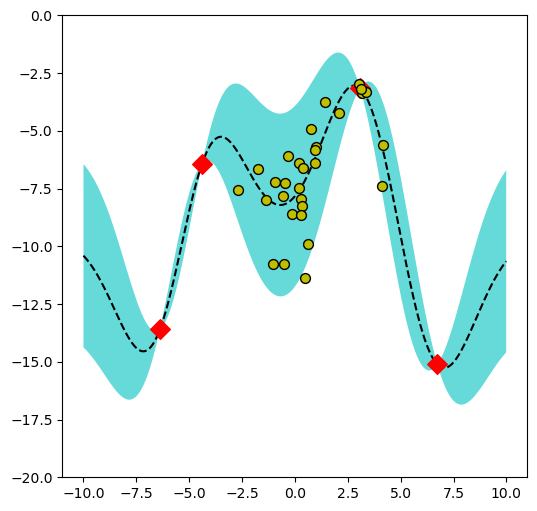

In [9]:
h1_index = (np.floor(sample_h1*100)/100 + 10) / 0.01

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.plot(h1, mean_h2, c = 'k', linestyle="dashed", zorder=1)
ax.scatter(data_h1, data_h2, color = 'r', marker ="D", s=100,  zorder=2)
ax.fill_between(h1, mean_h2 + 2* np.sqrt(abs(np.diag(covar_h2))), mean_h2 - 2* np.sqrt(abs(np.diag(covar_h2))), facecolor='#66D9D9', zorder=0)
sample_h2 = np.empty(N)
for i, index in enumerate(h1_index):
    index = int(index)
    sample_h2[i] = np.random.normal(loc = mean_h2[index], scale = np.sqrt(abs(covar_h2[index, index])), size = 1)
    ax.scatter(h1[index], sample_h2[i], color = 'y', edgecolors="k", marker ="o", s=50,  zorder=3)
ax.set_ylim(-20, 0)

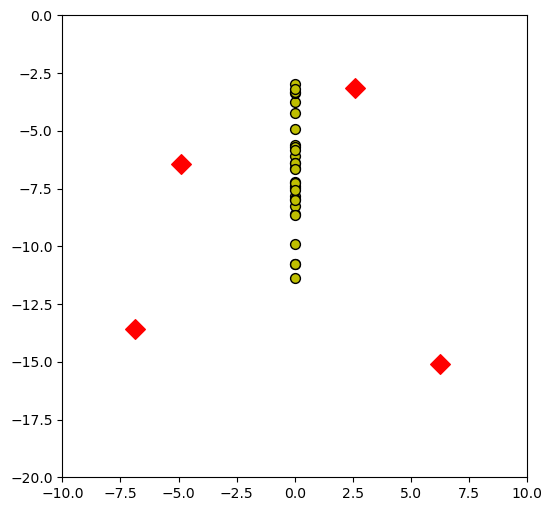

In [10]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.scatter(sample_x, sample_h2, color = 'y', edgecolors="k", marker ="o", s=50,  zorder=2)
ax.set_xlim(-10 ,10)
ax.set_ylim(-20, 0)
ax.scatter(data_x, data_h2, color = 'r', marker ="D", s=100,  zorder=4)

(-10.0, 10.0)

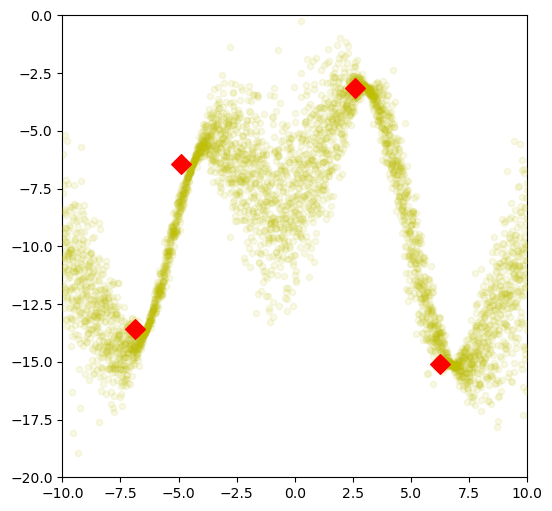

In [11]:
N = 2
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.scatter(data_x, data_h2, color = 'r', marker ="D", s=100,  zorder=4)
for x_index, predict_x in enumerate(x):
    predict_x = np.full(N, predict_x)
    # h1 のサンプルを取得する
    sample_h1 = np.random.normal(loc = mean_h1[x_index], scale = np.sqrt(abs(covar_h1[x_index, x_index])), size = N)
    
    # h1のindexを取得する
    h1_index = (np.floor(sample_h1*100)/100 + 10) / 0.01

    # 取得したindexにおけるh1でh2の事後分布からサンプルを得る
    sample_h2 = np.empty(N)
    for i, index in enumerate(h1_index):
        index = int(index)
        sample_h2[i] = np.random.normal(loc = mean_h2[x_index], scale = np.sqrt(abs(covar_h2[x_index, x_index])), size = 1)

    ax.scatter(predict_x, sample_h2, color = 'y', marker ="o", s=20,  zorder=3, alpha=0.1)
ax.set_ylim(-20, 0)
ax.set_xlim(-10, 10)